# Week-22

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [3]:
cols=['Location', 'MinTemp', 'MaxTemp', 'Rainfall','WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
      'Pressure9am', 'Pressure3pm','Humidity9am','Humidity3pm']
df= data[cols]
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0
3,Albury,9.2,28.0,0.0,NE,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0
4,Albury,17.5,32.3,1.0,W,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0


In [4]:
df.shape

(145460, 12)

In [5]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Pressure9am      15065
Pressure3pm      15028
Humidity9am       2654
Humidity3pm       4507
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
count,120366.000000,120366.000000,120366.000000,120366.000000,120366.000000,120366.000000,120366.000000,120366.000000,120366.000000,120366.000000
mean,12.389435,23.483479,2.327709,40.120840,14.376161,19.086727,1017.654834,1015.253068,68.298033,50.883539
std,6.363118,6.983335,8.473447,13.487106,8.805772,8.678411,7.098417,7.018884,19.118671,20.690020
min,-8.200000,2.600000,0.000000,6.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000
25%,7.800000,18.100000,0.000000,31.000000,7.000000,13.000000,1013.000000,1010.500000,56.000000,36.000000
50%,12.100000,22.900000,0.000000,39.000000,13.000000,19.000000,1017.600000,1015.200000,69.000000,51.000000
75%,17.000000,28.500000,0.600000,48.000000,20.000000,24.000000,1022.400000,1020.000000,82.000000,65.000000
max,33.900000,48.100000,367.600000,135.000000,87.000000,87.000000,1041.000000,1039.600000,100.000000,100.000000


In [8]:
df.duplicated().value_counts()

False    120366
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

summary(df)

Data shape: (120366, 12)
___________________________
Data Types:
float64    10
object      2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Humidity3pm,float64,120366,101,0,0,100
Humidity9am,float64,120366,101,0,0,100
Location,object,120366,44,0,Adelaide,Woomera
MaxTemp,float64,120366,413,0,2.6,48.1
MinTemp,float64,120366,380,0,-8.2,33.9
Pressure3pm,float64,120366,542,0,977.1,1039.6
Pressure9am,float64,120366,544,0,980.5,1041
Rainfall,float64,120366,643,0,0,367.6
WindGustDir,object,120366,16,0,E,WSW
WindGustSpeed,float64,120366,67,0,6,135


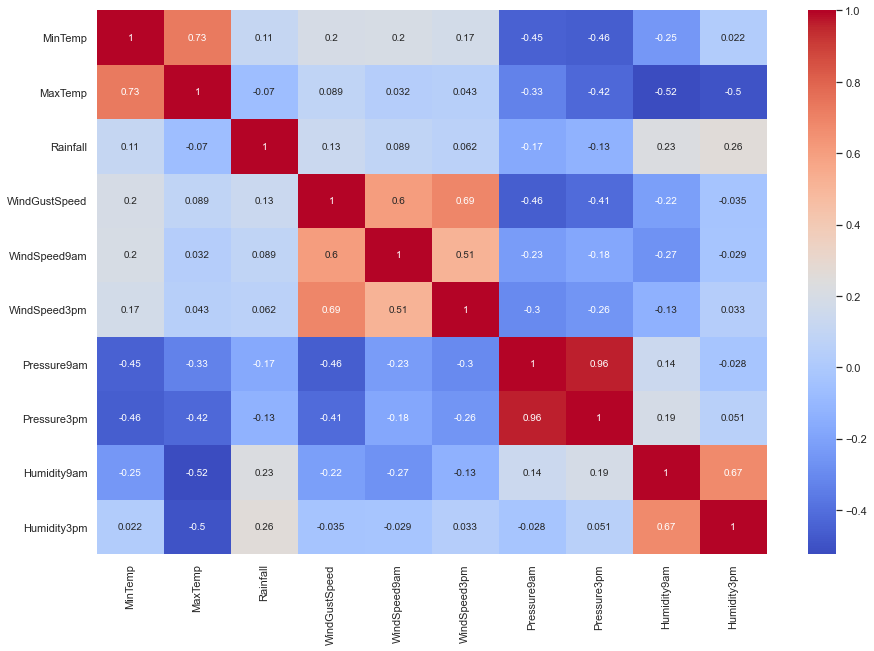

In [12]:
# for all variables 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

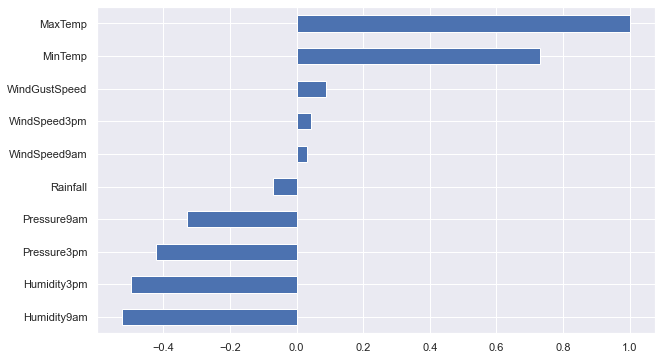

In [13]:
plt.figure(figsize=(10,6))
df.corr()["MaxTemp"].sort_values().plot.barh();

In [14]:
df_notdummy=df.copy()
df= pd.get_dummies(df)
df.head(2)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
df_notdummy.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0
3,Albury,9.2,28.0,0.0,NE,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0
4,Albury,17.5,32.3,1.0,W,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0


## ML Modelling

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

In [17]:
X=df.drop(["MaxTemp"], axis=1)
y=df["MaxTemp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [18]:
'''
Feature sayisi sistikce, arttikca sentetik sekilde R2_score artmaya meyillidir. 
R2_score, icinde fazla feature i cezalandiran yontem yoktur. 
‘overfitting’ durumunda yüksek R-kare değerlerine ulaşabilirsiniz.
R2_score fikir verir ama burada en onemli metrik RMSE dir.

R2_score, dusukse model basarisizdir, yuksekse baska metriklere bakip model degerlendirmesi yapilir.

'''

def eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, model):
    cv_score = cross_val_score(estimator=model, X=X_test, y=y_test, cv=10).mean()
    cv_RMSEs = cross_val_score(estimator=model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
    cv_rmse = np.sqrt(-cv_RMSEs.mean())
    
    rmse = [np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_train, y_pred_train)), cv_rmse]
    mae = [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_train, y_pred_train)]
    mse = [mean_squared_error(y_test, y_pred) , mean_squared_error(y_train, y_pred_train) ]
    score = [r2_score(y_test, y_pred), r2_score(y_train, y_pred_train), cv_score]
    dic = {'R2_Score':score, 
#      'MAE':mae, 
#      'MSE':mse, 
     'RMSE':rmse} 
#     return pd.Series(dic).to_frame().rename(columns={0:"Test", 1:'Train'})
    return pd.DataFrame(dic).T.rename(columns={0:"Test", 1:'Train', 2:'Cross_Val'})


### 1- Linear Regression

In [20]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [21]:
y_pred=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

In [22]:
lin_reg = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, lr)
lin_reg

,Test,Train,Cross_Val
R2_Score,0.864698,0.864086,0.864410
RMSE,2.563295,2.576308,2.565672


Train and test evaluation scores are near with each oother. So We can say there is no overfitting.

In [23]:
# my_dict = { 'Actual': y_test, 'Pred': y_pred }
# compare = pd.DataFrame(my_dict)
# compare.head(10)

### 2.Ridge Regression

In [24]:
ridge_model=Ridge(normalize=True)
ridge_model.fit(X_train, y_train)

Ridge(normalize=True)

In [25]:
y_pred=ridge_model.predict(X_test)
y_pred_train=ridge_model.predict(X_train)

In [26]:
eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, ridge_model)

,Test,Train,Cross_Val
R2_Score,0.695342,0.695690,0.694519
RMSE,3.846393,3.854985,3.851291


In [27]:
alpha_space = np.linspace(0.01, 5, 50)

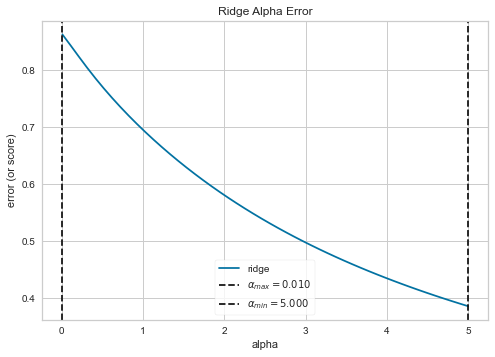

In [28]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space 

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)

visualizer.fit(X_train, y_train)
visualizer.show();

In [29]:
ridge_model = Ridge(0.001, normalize=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
y_pred_train = ridge_model.predict(X_train)

ridge = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, ridge_model)
ridge

,Test,Train,Cross_Val
R2_Score,0.864664,0.864066,0.864400
RMSE,2.563620,2.576495,2.565776


### 3.Lasso regression

In [30]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [31]:
y_pred=lasso_model.predict(X_test)
y_pred_train=lasso_model.predict(X_train)

In [32]:
eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, lasso_model)

,Test,Train,Cross_Val
R2_Score,0.823355,0.823454,0.823224
RMSE,2.928853,2.936256,2.929508


In [33]:
alpha_space = np.linspace(0.01, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(X_train, y_train)
# normalize=True deyince ayrica scaling yapmaya gerek yok

# ridge yavas, lasso hizli calisir

In [34]:
lasso_cv_model.alpha_

0.01

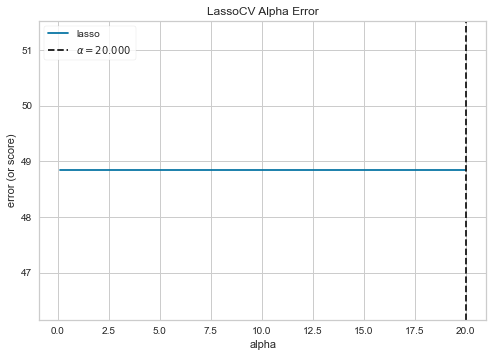

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [35]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

**alpha yi manuel buyutursek feature sayisini dusurur ama R2 score dan feragat etmemiz gerekir**

In [36]:
# alpha yi manuel buyutursek feature sayisini dusurur ama R2 score dan feragat etmemiz gerekir
lasso_model = Lasso(0.01).fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)
y_pred_train=lasso_model.predict(X_train)

In [37]:
lasso = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, lasso_model)
lasso

,Test,Train,Cross_Val
R2_Score,0.861082,0.860206,0.860652
RMSE,2.597322,2.612823,2.601030


### 4.Elastic Net

In [38]:
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=[.01, .1, .7,.9, .95, .99, 1])
elastic_model.fit(X_train,y_train)

ElasticNetCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
             l1_ratio=[0.01, 0.1, 0.7, 0.9, 0.95, 0.99, 1])

In [39]:
elastic_model.l1_ratio_

0.01

In [40]:
elastic_model.alpha_

0.1

In [41]:
y_pred = elastic_model.predict(X_test)
y_pred_train=elastic_model.predict(X_train)

In [42]:
elastic = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, elastic_model)
elastic

,Test,Train,Cross_Val
R2_Score,0.850389,0.848888,0.850291
RMSE,2.695435,2.716525,2.695944


### 5.Polynomial Regression

In [43]:
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [44]:
pol_model = LinearRegression(normalize=True)
pol_model.fit(X_poly_train,y_train)
y_pred=pol_model.predict(X_poly_test)
y_pred_train=pol_model.predict(X_poly_train)

In [46]:
polinom = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, pol_model)
polinom

,Test,Train,Cross_Val
R2_Score,0.906752,0.909817,0.864410
RMSE,2.127976,2.098593,2.565672


### Result

In [47]:
df_input = pd.read_excel("performance_table.xlsx", engine= "openpyxl")
df_input

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
0,Sydney,11,19,0,W,15,17,30,1015.7,1013.9,77,47


In [48]:
X = df_input.drop('MaxTemp', axis=1)
all_columns=df.drop('MaxTemp',axis=1).columns

In [49]:
X = pd.get_dummies(X,columns=['Location', 'WindGustDir']).reindex(columns=all_columns, fill_value=0)
X

,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm,Location_Adelaide,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,11,0,15,17,30,1015.7,1013.9,77,47,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
models={'Linear Reg.':lr,
        'Ridge Model' : ridge_model,
        'Lasso Model' : lasso_model,
        "Elasticnet Model": elastic_model,
        "Polinomial Reg.": pol_model }

In [51]:
print(f"MaxTemp : {df_input['MaxTemp'].values[0]}\n")
print('Predictions:\n','*'*40, sep='')
for k,v in models.items():
    prediction= v.predict(X) if k!='Polinomial Reg.' else pol_model.predict(poly.transform(X))
    print(f"{k}: {prediction[0]}")

MaxTemp : 19

Predictions:
****************************************
Linear Reg.: 19.8603515625
Ridge Model: 19.86866887514519
Lasso Model: 20.736055551301675
Elasticnet Model: 22.011006138297304
Polinomial Reg.: 20.957321166992188


In [58]:
data = [lin_reg, ridge, lasso,elastic, polinom]
headers = ["Linear Reg.", "Ridge Model","Lasso Model","Elasticnet Model","Polinomial Reg."]
pd.concat(data, axis=1, keys=headers).T

R2_Score      RMSE
Linear Reg.      Test       0.864698  2.563295
                 Train      0.864086  2.576308
                 Cross_Val  0.864410  2.565672
Ridge Model      Test       0.864664  2.563620
                 Train      0.864066  2.576495
                 Cross_Val  0.864400  2.565776
Lasso Model      Test       0.861082  2.597322
                 Train      0.860206  2.612823
                 Cross_Val  0.860652  2.601030
Elasticnet Model Test       0.850389  2.695435
                 Train      0.848888  2.716525
                 Cross_Val  0.850291  2.695944
Polinomial Reg.  Test       0.906752  2.127976
                 Train      0.909817  2.098593
                 Cross_Val  0.864410  2.565672